# Lending Environment Simulation & Lender Evaluation Tool

# Feature Selection

In [49]:
import glob
import os
import numpy as np
import pandas as pd
from kasi.processing import data_processor as pc
from kasi.processing import dictionaries as dc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
plt.rcParams.update({'font.size': 14})


input_path = "../../data/processed/clean_data.csv"
df = pd.read_csv(input_path)
nfeatures = 20

In [50]:
data = df.iloc[:,2:36]  #do not include date and location
credit_score = df['credit_score_category'] 
lender_score = df['lender_score_category'] 
data.rename(columns=dc.columns, 
                 inplace=True)

## Lending Environmnet

### Univariate Selection

In [51]:
bestfeatures = SelectKBest(chi2, k="all")
fit = bestfeatures.fit(data,credit_score)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(nfeatures,'Score')) 

                                                                                                Feature        Score
20                                                              Do you receive your money back in time?  4749.095968
14                                  Over the past 3 months, how many times have you lent someone money?  1077.694415
22                                                    What's the most common use of the money you lend?   727.163027
18                                       Do you include either interest or a lending fee when you lend?   536.273308
15                                                          On average how much do you lend in general?   512.080280
16                                                      Who did you lend money to in the past 3 months?   441.736339
29                                                      What type of loans are you currently paying of?   360.285654
19                                                             D

### Feature Importance

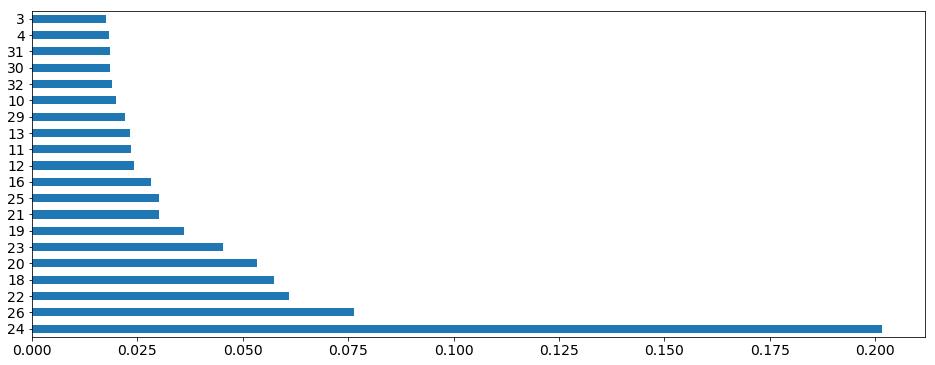

In [52]:
dt = df.iloc[:,2:36]
model = ExtraTreesClassifier(n_estimators=100)
model.fit(dt,credit_score)

#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=dt.columns)
nlargest = feat_importances.nlargest(nfeatures)
_= nlargest.plot(kind="barh", figsize=(16,6)) #,rot=35,fontsize = 25

Selected: **'24', '26', '22', '18', '20', '23', '19', '16', '21', '25'**

## Lender Evaluation

### Univariate Selection

In [53]:
bestfeatures = SelectKBest(chi2, k="all")
fit = bestfeatures.fit(data,lender_score)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(nfeatures,'Score')) 

                                                                                                Feature        Score
20                                                              Do you receive your money back in time?  6667.831316
18                                       Do you include either interest or a lending fee when you lend?  3588.478658
19                                                             Do you request guarantees when you lend?  3339.377271
14                                  Over the past 3 months, how many times have you lent someone money?  2014.330110
13                                                                                              Country   595.871957
21     Assuming that you have lent money at least ten times, how often would you get your money repaid?   555.595727
15                                                          On average how much do you lend in general?   460.156830
22                                                    What's the

### Feature Importance

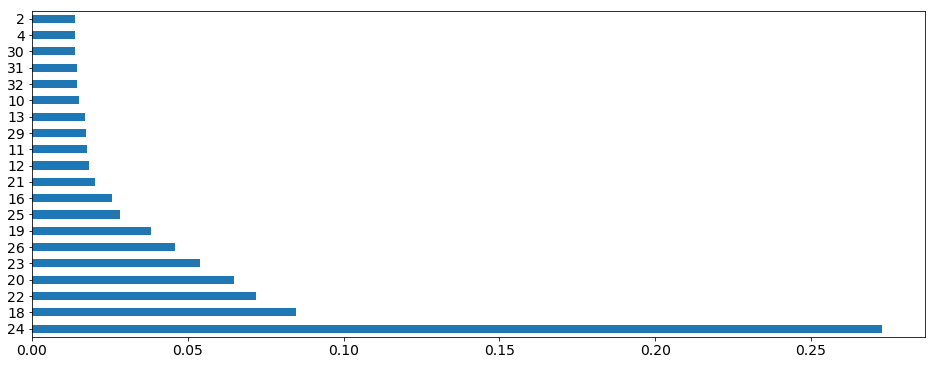

In [54]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(dt,lender_score)
feat_importances = pd.Series(model.feature_importances_, index=dt.columns)
nlargest = feat_importances.nlargest(nfeatures)
_= nlargest.plot(kind="barh", figsize=(16,6))

Selected: **'24', '18', '22', '23', '20', '26', '19', '25', '16', '12', '11', '21'**

## Feature Correlation Matrix

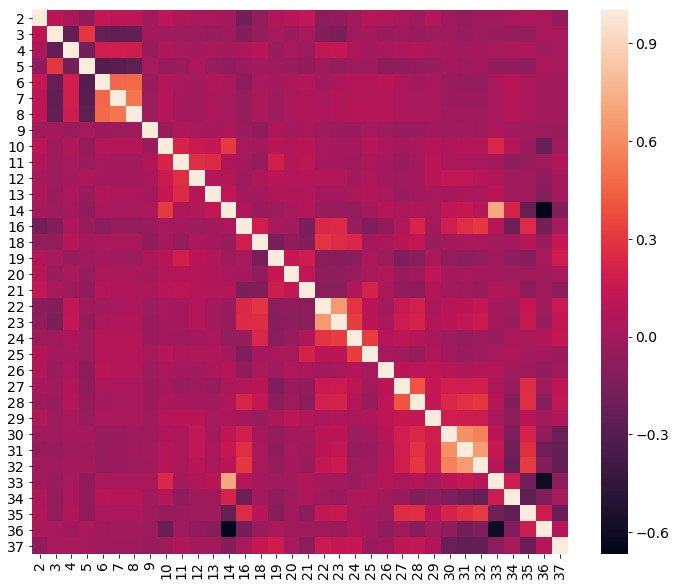

In [55]:
dt = df.iloc[:,2:36]  #do not include date and location
corrmat = dt.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,10))
#plot heat map
_=sns.heatmap(dt[top_corr_features].corr(),annot=False)
